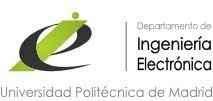

<div align="center">

# **Inteligencia en Sistemas Electrónicos (INSE)**
# Practice: Smart Health
## Physical Activity Recognition based on 3D accelerometer


---
---

</div>


In many contexts, having information about **the movements of a person could help to diagnose certain deseases**. One clear example can be Parkinson, a progressive disorder that affects the nervous system and movement. In some cases, it starts with soft tremblings that are not perceptible by the human-eye but easy to detect by an inertial sensor.
This example illustrates how attaching inertial sensors to different parts of the body could help to make an early diagnosis of certain illness and implement sollutions: "Smart" Spoon for Parkinson's Sufferers (https://www.youtube.com/watch?v=WiVQcgmIi08&ab_channel=BrianMKAllen).

The image below represents the overall diagram of a remote monitoring system for patients with diseases of musculoskeletal system, based on data collected from different types of motion sensors (accelerometers, magnetometers, gyroscopes...). Data collected by these sensors give information about the movements (and related activities) that the person performs. Once the raw signals are obtained, they can be pre-processed to remove noise, filter spourious signals and compute compact features for training a machine-learning model.

In this practice we will develope a simple **hand gesture recognizer based on 3D pattern assembled trajectories recorded by an accelerometer sensor**.



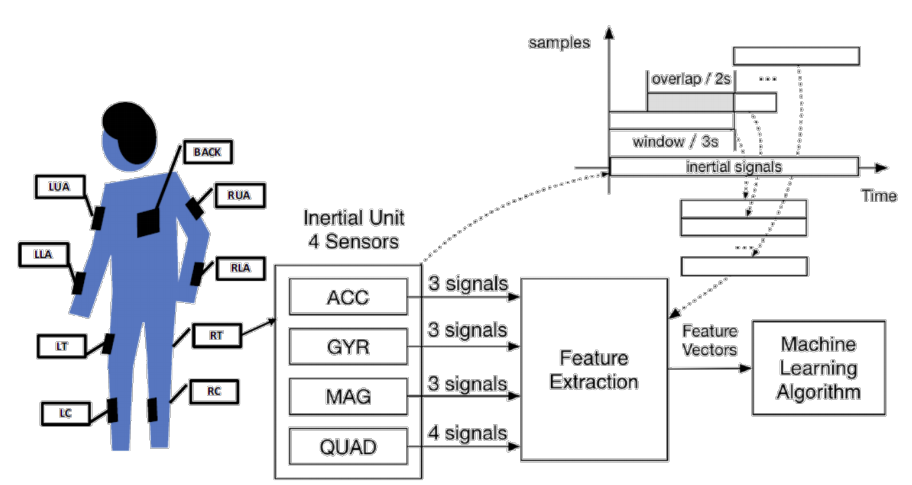


**Data Analysis**

As introduced before, in this session we will work with 3D data (X, Y, Z axis) obtained from accelerometers. Data was collected from participants while doing different movements.


These activities conform the classes between we should discern distributed uniformly in the dataset.

The corpus contains 10.560 instances with 200 attributes per axis (one sample lasts 4 seconds, being the sampling frequency of the acceleromenter 50 Hz). Overall, each instance has 600 attributes.

These 10.560 instances are distributed in 63.63% for the training set (6.720) and a 36.36% for test set (3.840).


As it is shown in the slices of the subject, Weka lets make a first simple visual analysis of the attributes that could give better results to distinguish between classes. Try to load the training arff and visualize the distributions of the classes and the relation between pairs of attributes.


**Summary**

This practice is dedicated to the familiarization with the tools introduced during the course, more specifically, to Weka and Tensorflow.

The main concepts that we will work are:

1. Firstly, we will study how the algorithms perform introducing raw data. As an example, we will use a Decission Tree available in Weka (J48) although other algorithms can be tested too.
2. Secondly, we will extract some features from the raw accelerometer signal, more concretely, MFCCs (Mel-frequency cepstral coefficients) and functionals (mean and standard deviation) from each axis, and we will train another J48 Tree. For more information about these features, visit: (https://medium.com/@jonathan_hui/speech-recognition-feature-extraction-mfcc-plp-5455f5a69dd9)
3. Thirdly, we will compare the results of the 2 previous approaches with those obtained with a a LSTM (Long Short-Term Memory), a type of recurrent neural network.


# Environment Set-up

In this section, we will download all the neccessary packages for running the experiments.

Among the packages and libraries installed, the most important are:

*   **oct2py**: This Python library lets run m-files from Python. Function in this practice: Extract MFCC features and their functionals.
*   **python-weka-wrapper**: This python library makes easy to run Weka algorithms from Python. It offers access to Weka API using thin wrappers around JNI calls employing the javabridge package. Function in this practice: Training-Evaluation-Testing algorithms.
* **pandas**: Python library that lets deal with csv and convert them to a DataFrame, type of data organization in a kind of table format.
* **tensorflow**: Open source software library for numerical computation using data-flow graphs and for implementing and training artificial neural networks.
* **numpy**: This Python library is oriented to make numeric operactions, algebra and mathematic analysis.
* **matplotlib**: This Python library contains graphic plot functions, similr to the resources available in Matlab for showing graphs.

As first action, run all the cells that you find below until the next section (READ IMPORTANT MESSAGE BELOW), in this way we will set-up the environment.


**IMPORTANT:** For the third cell, we should pay attention to the message that appears during the authentication process, since it asks for introducing a code into an empty field. This code is provided after clicking on the link that is located above the empty rectangle. Once the link is opened in a new window, we should copy the code into the empty rectangle and press Enter to continue with the process.

## Google drive connection

In [1]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## General path configuration

In [2]:
general_path = r'/content/drive/MyDrive/HAR_INERCIAL/'

## Octave libraries installation

**IMPORTANT:** After installation, the session may restart automatically. This is normal. Once it restarts, simply continue with the next steps **without** running the installation cell again (the libraries are already installed).


In [ ]:
# 1. Actualizar repositorios (silencioso)
!apt-get update -qq

# 2. Instalar Octave y todas las librerías necesarias de una sola vez
# Eliminamos 'build-dep' y 'unzip', y agrupamos todo.
!apt-get install -y -qq octave octave-tsa octave-linear-algebra octave-signal

# 3. Instalar oct2py (silencioso)
!pip install -q oct2py

print("Instalación completada con éxito.")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Instalación completada con éxito.


## Octave path configuration

In [ ]:
from oct2py import octave

# 'octave' folder with octave files must be placed in general_path directory
octave_path = general_path + '/src/octave/'
octave.addpath(octave_path)

    _pyeval at line 57 column 30



'.:/usr/local/lib/python3.12/dist-packages/oct2py:/usr/local/lib/python3.12/dist-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/6.4.0/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v56/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/site/m:/usr/share/octave/site/api-v56/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/6.4.0/oct/x86_64-pc-linux-gnu:/usr/share/octave/6.4.0/m:/usr/share/octave/6.4.0/m/audio:/usr/share/octave/6.4.0/m/deprecated:/usr/share/octave/6.4.0/m/elfun:/usr/share/octave/6.4.0/m/general:/usr/share/octave/6.4.0/m/geometry:/usr/share/octave/6.4.0/m/gui:/usr/share/octave/6.4.0/m/help:/usr/share/octave/6.4.0/m/image:/usr/share/octave/6.4.0/m/io:/usr/share/octave/6.4.0/m/java:/usr/share/octave/6.4.0/m/legacy:/usr/share/octave/6.4.0/m/linear-algebra:/usr/share/octave/6.4.0/m/miscellaneous:/usr/share/octave/6.4.0/m/ode:/usr/share/octave/

## Weka libraries installation

In [ ]:
# 1. Instalar librerías geoespaciales del sistema (Agrupadas y silenciosas)
!apt-get install -y -qq libproj-dev proj-data proj-bin libgeos-dev

# 2. Instalar Weka Wrapper
# (Cython ya viene preinstalado en Colab, no hace falta pedirlo)
!pip install -q python-weka-wrapper3

print("Librerías de Weka y Geoespaciales instaladas.")

Selecting previously unselected package proj-bin.
(Reading database ... 133002 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.3.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.3.1-1~jammy0) ...
Setting up proj-bin (9.3.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 100.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 39.7 MB/s eta 0:00:00
Librerías de Weka y Geoespaciales instaladas.


## Java VM start for WEKA

**TROUBLESHOOTING**: try reducing max_heap_size in the jvm.start command in case of problems when executing the cell below to run the Java Virtual Machine

In [ ]:
import os
import weka.core.jvm as jvm

# 1. ASIGNAR LA RUTA DE JAVA MANUALMENTE
# Esta es la ruta estándar de Java 11 en los entornos Ubuntu de Colab
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"

print("Configurando entorno Java...")

# 2. ARRANCAR LA JVM (Con protección)
# Verificamos si ya está corriendo para evitar errores si ejecutas la celda dos veces
if not jvm.started:
    try:
        jvm.start(max_heap_size="512m")
        print("✅ JVM iniciada con éxito. Weka está listo.")
    except Exception as e:
        print(f"❌ Error al iniciar: {e}")
else:
    print("ℹ️ La JVM ya estaba en ejecución. Puedes continuar.")


#import weka.core.jvm as jvm

# Create new instance of java virtual machine for running weka
#jvm.start(max_heap_size="1200m")

Configurando entorno Java...
ℹ️ La JVM ya estaba en ejecución. Puedes continuar.


**TROUBLESHOOTING:** Run the next cell in case of a no JVM installed error

In [ ]:
# For more info, see: https://colab.research.google.com/github/kzafeiroudi/QuestRecommend/blob/master/TrainingOnQuora.ipynb#scrollTo=mrcWHtCRqFl-
# Install java and set environment variable
import os #importing os to set environment variable

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # set environment variable
  !java -version # check java version

install_java()

openjdk version "17.0.16" 2025-07-15
OpenJDK Runtime Environment (build 17.0.16+8-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 17.0.16+8-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)


## Relevant python libraries import

In [ ]:
# Import other libraries
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load and prepare the data


### Libraries IMPORT

In [ ]:
# We add general_path to the Python system
if general_path not in sys.path:
    sys.path.append(general_path)

# Now Python should be able to find 'src' inside that path
import src.notebook.har_utils as hu
import src.notebook.weka_utils as weka # Functions that we require for loading datasets, training and evaluating algorithms in Weka.
import src.notebook.display_utils as display
import src.notebook.octave_utils as octave

print("¡Librerías cargada con éxito desde Drive!")

¡Librerías cargada con éxito desde Drive!


Use this if reloading libraries is required

In [ ]:
import importlib
importlib.reload(hu)
importlib.reload(weka)
importlib.reload(display)
importlib.reload(octave)

<module 'src.octave_utils' from '/content/drive/MyDrive/HAR_INERCIAL/src/octave_utils.py'>

### Input data specification
**IMPORTANT:** The student must provide the path to the name of the appropriate CSV file.

In [ ]:
path_data = general_path + r'/data/my_dataset/SHAKE_CIRCLES_TILT.csv'

## General experiment setup

In [ ]:
# Desired percentage split for your data (you can change it)
percentage_test_split = 0.2

# Our .csv file does NOT include user id info
csv_with_user_info=False

df_csv = hu.DownloadDS(path_data, csv_with_user_info)

# Obtain X and y
if csv_with_user_info:
  X = df_csv.drop(['class', 'user'], axis=1)
else:
  X = df_csv.drop(['class'], axis=1)

# Target variable 'class'
y = df_csv['class']

# Split data (you can change)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=percentage_test_split,
                                                    random_state=42)

# Next is part of the data preparation process for machine learning training,
# where a new dataset is gonna be created with an additional "user" column that has a constant value of 1.

# We take the two DataFrames, X_train and y_train, concatenate them side by side,
# and reset the index of the resulting DataFrame,
df_train_csv = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# then add a new column called "user" with all values equal to 1 in that resulting DataFrame df_train_csv.
#df_train_csv = df_train_csv.assign(user=pd.Series(1, index=df_train_csv.index))

# Same for test
df_test_csv = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
#df_test_csv = df_test_csv.assign(user=pd.Series(1, index=df_test_csv.index))

print('df_test_csv\n', df_test_csv)

df_test_csv
        param1     param2     param3     param4     param5     param6  \
0    9.093438   9.435728   9.507538   9.205939   9.299291   9.658337   
1    8.279601   9.237056  10.115523  10.599037  11.630697   9.521899   
2    9.414186   9.457271   9.502750   9.399824   9.356738   9.122162   
3    5.672927   1.546291  -1.105862  -1.946029   0.339897   5.972131   
4    9.754083   9.916851  10.146639  10.211268  10.187331   9.974297   
5    1.510387   1.496025   1.498419   1.512781   1.493631   1.515174   
6    9.663124   9.663124   9.964723  10.117916  10.534409  10.448239   
7   12.482832  17.116919  19.994074  16.733937  15.321690  11.582823   
8   -1.335651   0.126863   4.418659  12.875389  18.840340  21.695953   
9   11.061011  11.061011   3.791526   2.178212   2.994444   4.035677   
10   5.574787   5.574787  23.294905  25.226572  21.559514  15.628075   
11   9.220301   9.935999   9.799562   9.787594   9.689454   9.794774   
12  10.802497  10.266321   8.571625   8.018694   8.

# List of classes specification

Please, edit the following code to match your classes.

**IMPORTANT:**

**Do NOT forget to use the sorted() embracing the list of classes!!!!**

**Do NOT forget to update num_classes accordingly!!!**

In [ ]:
num_classes = 3
classes_list = sorted(['CIRCLES', 'SHAKE', 'TILT'])
class_mapping = display.create_class_mapping(classes_list)
root_class_list = '_'.join(classes_list)
print(' ')
print('[CLASSES]')
print(class_mapping)
print('[root_class_list][%s]' % root_class_list)

 
[CLASSES]
{1: 'CIRCLES', 2: 'SHAKE', 3: 'TILT'}
[root_class_list][CIRCLES_SHAKE_TILT]


In [ ]:
df_train_csv

,param1,param2,param3,param4,param5,param6,param7,param8,param9,param10,...,param592,param593,param594,param595,param596,param597,param598,param599,param600,class
0,7.346081,7.094749,6.931981,6.790756,7.006184,7.116292,7.252729,7.276666,7.188101,7.133047,...,2.185393,1.953210,2.908273,2.982475,2.659334,2.367310,2.094435,2.403215,2.022626,TILT
1,8.523752,8.554869,8.444762,8.351410,9.387856,10.053287,10.177757,10.266321,10.156215,10.091586,...,3.722110,3.130881,2.032200,1.790443,1.606132,0.648676,0.483515,0.339897,0.675006,CIRCLES
2,15.778875,12.317671,7.559115,4.473713,2.661728,2.161457,4.023709,6.065483,9.320834,16.394040,...,1.845496,1.263842,-0.225002,-6.240219,-7.226399,-5.885960,-2.592312,0.366227,1.022084,SHAKE
3,9.727753,9.713391,9.655943,9.095832,9.012054,9.237056,9.237056,8.894766,9.734933,9.557804,...,1.642037,1.153734,0.885647,0.337503,0.344684,-0.789901,-1.412248,-1.898156,-1.981934,CIRCLES
4,9.282536,9.995841,9.172428,9.272961,9.313653,9.203546,9.215514,9.050353,9.584134,10.735475,...,4.813610,4.827972,4.887813,4.725045,4.725045,3.571311,4.375574,4.375574,5.160688,CIRCLES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,17.404156,19.285557,16.949365,12.789218,9.909669,6.572935,3.492321,3.015986,2.422364,2.810133,...,-7.051663,-6.831448,-4.342063,-1.850284,1.139373,3.815462,4.370787,3.561736,2.379278,SHAKE
67,9.038384,9.052746,9.045565,9.016842,9.086257,8.980937,8.973756,8.997693,9.148492,9.141311,...,1.282991,1.474482,1.579802,1.572622,1.871826,1.996296,2.173425,2.206936,2.336193,TILT
68,11.264469,10.941329,10.941329,9.004873,8.004332,8.346623,7.628531,7.381986,7.381986,7.906193,...,4.471319,5.725587,5.045793,4.365999,4.181689,5.282763,5.392871,4.533554,4.117061,TILT
69,13.732312,21.435046,21.356055,18.744595,11.525377,7.087568,4.196051,0.591229,-0.277662,1.723421,...,-4.188870,-0.196278,1.371556,3.331947,4.071581,3.997379,2.910666,1.998689,-2.283533,SHAKE


# Visualize some data

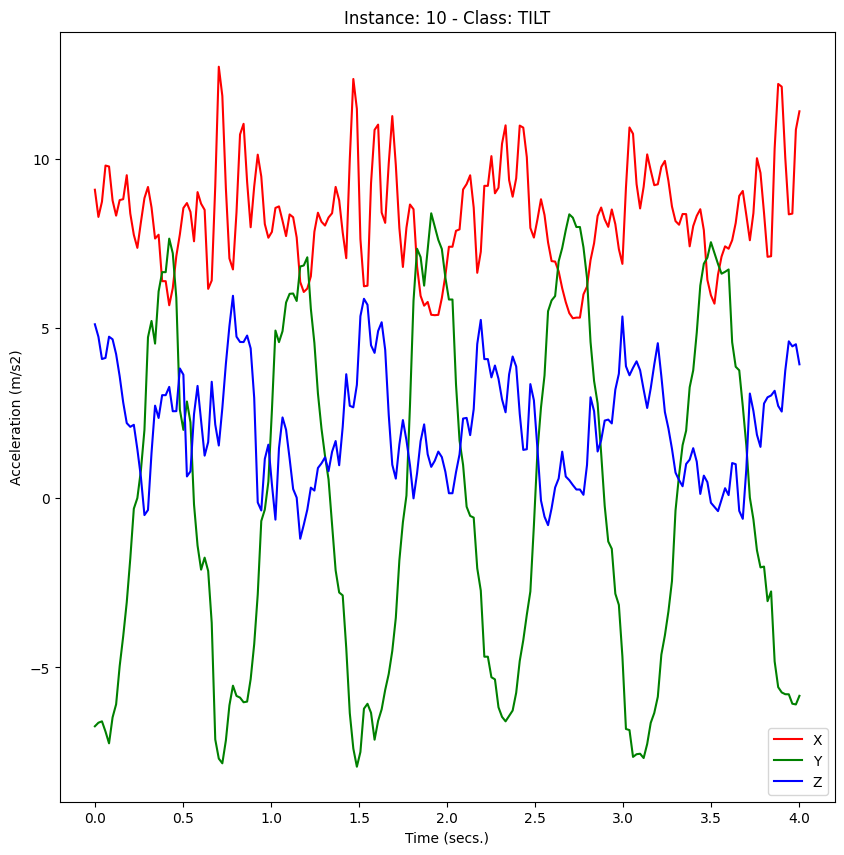

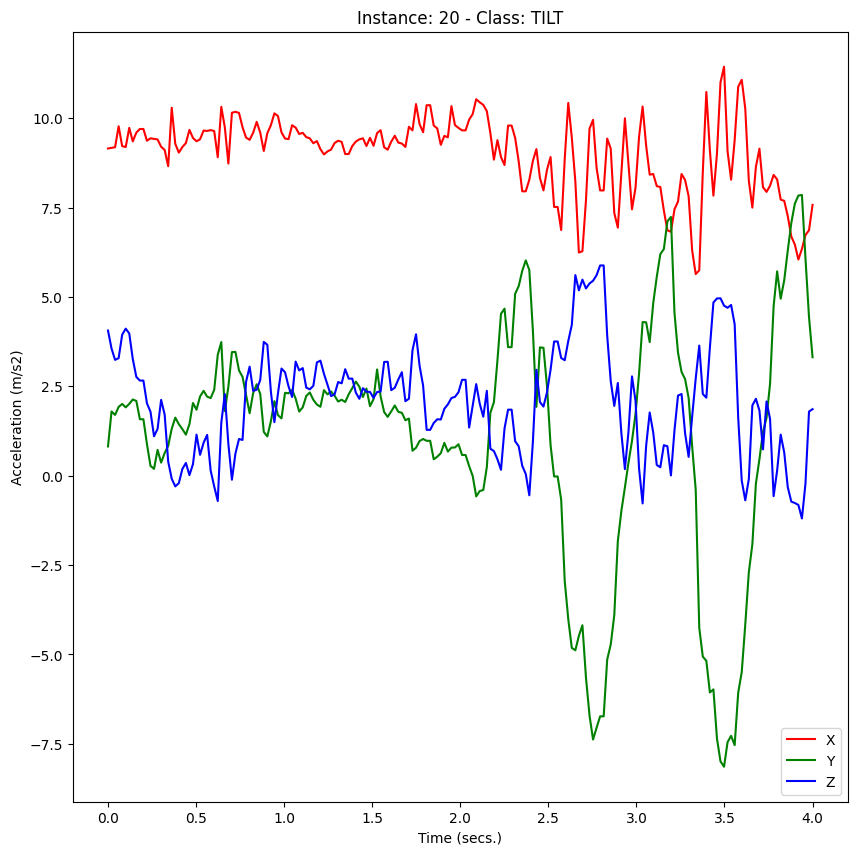

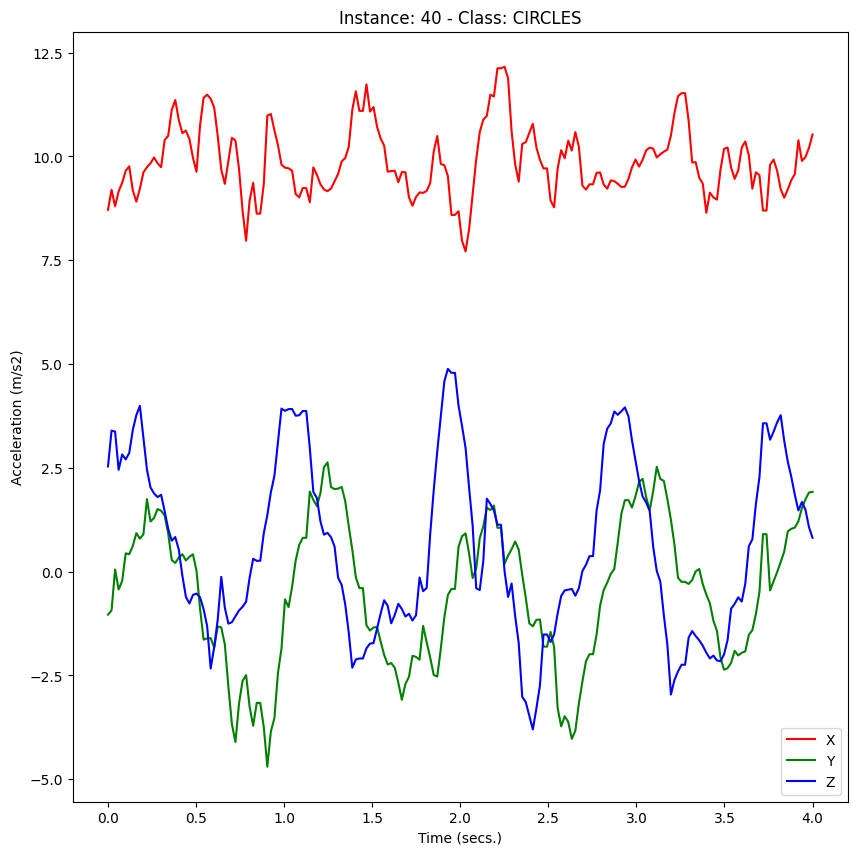

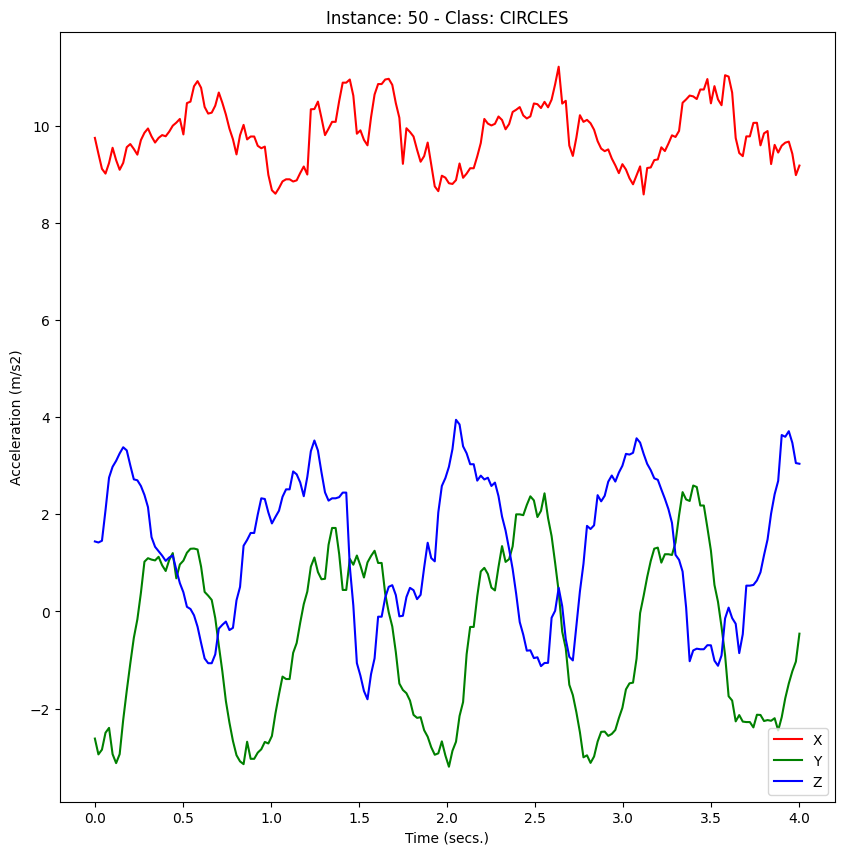

In [ ]:
# PLOT DATA:
# PLOT CSVs SINGLE SAMPLE
display.plot_sample(10, df_train_csv, class_mapping) # Class 1
display.plot_sample(20, df_train_csv, class_mapping) # Class 2
display.plot_sample(40, df_train_csv, class_mapping) # Class 3
display.plot_sample(50, df_train_csv, class_mapping) # Class 4

# Raw data + Decision Tree Scenario


This section englobes the experiments of the first scenario.

At the beginning, we will adapt the downloaded datasets to Weka expected format by transforming the labels from numerical type o nominal and appending them at the end of the attributes list.

After that, we will build and train a Decision Tree with the raw accelerometer data. We won’t process it in this part for having a reference performance before to include more complex proceedings.

At the end of this part, we will evaluate the model in terms of accuracy, and show the returned predictions of the trained model in our test set.


## 0) Data preparation

Save prepared .csv files

In [ ]:
# PREPARE DATA
hu.Save_CSV_from_Df(df_train_csv, class_mapping, root_class_list + '_df_train_nominal.csv')
hu.Save_CSV_from_Df(df_test_csv, class_mapping, root_class_list + '_df_test_nominal.csv')

## 1) Load raw data for WEKA

In [ ]:
# Load datasets as CSV
dataset_train_weka = weka.LoadDatasetAsCSV(root_class_list + '_df_train_nominal.csv', debug = False)
dataset_test_weka = weka.LoadDatasetAsCSV(root_class_list + '_df_test_nominal.csv', debug = False)

print('Sample size training: ', dataset_train_weka.num_instances)
print('Sample size testing: ', dataset_test_weka.num_instances)

Sample size training:  71
Sample size testing:  18


In [ ]:
print(dataset_train_weka[0:24])

@relation CIRCLES_SHAKE_TILT_df_train_nominal

@attribute param1 numeric
@attribute param2 numeric
@attribute param3 numeric
@attribute param4 numeric
@attribute param5 numeric
@attribute param6 numeric
@attribute param7 numeric
@attribute param8 numeric
@attribute param9 numeric
@attribute param10 numeric
@attribute param11 numeric
@attribute param12 numeric
@attribute param13 numeric
@attribute param14 numeric
@attribute param15 numeric
@attribute param16 numeric
@attribute param17 numeric
@attribute param18 numeric
@attribute param19 numeric
@attribute param20 numeric
@attribute param21 numeric
@attribute param22 numeric
@attribute param23 numeric
@attribute param24 numeric
@attribute param25 numeric
@attribute param26 numeric
@attribute param27 numeric
@attribute param28 numeric
@attribute param29 numeric
@attribute param30 numeric
@attribute param31 numeric
@attribute param32 numeric
@attribute param33 numeric
@attribute param34 numeric
@attribute param35 numeric
@attribute param3

## 2) WEKA model training

In [ ]:
# TRAIN NEW MODEL FROM RAW DATA

print('Classifying on: ', dataset_test_weka.class_attribute)

# Create model architecture:
options_J48 = ["-C", "0.25"]
model_arquitecture = weka.CreateClassifier(classname="weka.classifiers.trees.J48", options=options_J48)

# Train model
!cd content; mkdir models
out_path_model = "models/trained_TreeRandomForest.model"
trained_model = weka.TrainModel(dataset_train_weka, model_arquitecture, out_path_model)

Classifying on:  @attribute labels {CIRCLES,SHAKE,TILT}
/bin/bash: line 1: cd: content: No such file or directory

[TrainedModel]


J48 pruned tree
------------------

param128 <= 5.799789: SHAKE (14.0)
param128 > 5.799789
|   param127 <= 11.443993
|   |   param185 <= 8.734392: TILT (17.0)
|   |   param185 > 8.734392
|   |   |   param358 <= 2.271564
|   |   |   |   param25 <= 8.145557: SHAKE (2.0/1.0)
|   |   |   |   param25 > 8.145557: CIRCLES (23.0)
|   |   |   param358 > 2.271564: TILT (7.0)
|   param127 > 11.443993: SHAKE (8.0)

Number of Leaves  : 	6

Size of the tree : 	11



## 3) WEKA model evaluation

In [ ]:
# EVALUATE MODEL
raw_system_test_acc = weka.EvalClassifier(trained_model, dataset_train_weka, dataset_test_weka)

--------RESULTS IN TRAINING----------

Correctly Classified Instances          70               98.5915 %
Incorrectly Classified Instances         1                1.4085 %
Kappa statistic                          0.9789
Mean absolute error                      0.0094
Root mean squared error                  0.0685
Relative absolute error                  2.1143 %
Root relative squared error             14.5408 %
Total Number of Instances               71     

--------RESULTS IN TEST----------

Correctly Classified Instances          12               66.6667 %
Incorrectly Classified Instances         6               33.3333 %
Kappa statistic                          0.4977
Mean absolute error                      0.2222
Root mean squared error                  0.4513
Relative absolute error                 49.8876 %
Root relative squared error             95.4931 %
Total Number of Instances               18     



In [ ]:
# SEE PREDICTIONS:
weka.Recognize(trained_model, dataset_test_weka)

# - actual - predicted - error - class distribution
1 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
2 - CIRCLES - SHAKE - yes  - [0.0, 0.5, 0.5]
3 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
4 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
5 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
6 - CIRCLES - SHAKE - yes  - [0.0, 0.5, 0.5]
7 - CIRCLES - TILT - yes  - [0.0, 0.0, 1.0]
8 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
9 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
10 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
11 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
12 - SHAKE - TILT - yes  - [0.0, 0.0, 1.0]
13 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
14 - TILT - CIRCLES - yes  - [1.0, 0.0, 0.0]
15 - TILT - CIRCLES - yes  - [1.0, 0.0, 0.0]
16 - TILT - TILT - no  - [0.0, 0.0, 1.0]
17 - TILT - TILT - no  - [0.0, 0.0, 1.0]
18 - TILT - TILT - no  - [0.0, 0.0, 1.0]


#Feature Extraction + Decision Tree Scenario



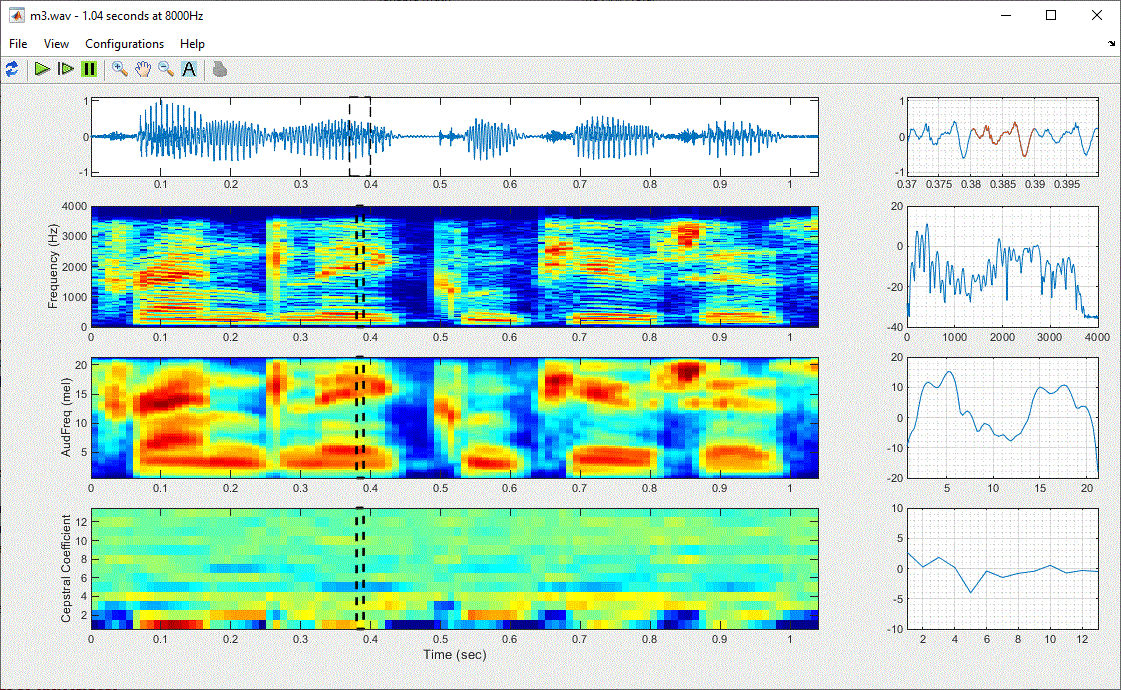

In this case, we will include a module whose function consists of extracting features from raw data. Among these features, we have Mel Frequency Cepstral Coeﬃcients (MFCC) that are usually employed in speech for representing information in a more compact way according to human auditive system. We will employ them in this new problem for simplicity(they are easy to extract), because MFCCs let work with much less information than raw signals and because they return uncorrelated features.

One of the main advantages of using features extracted from raw signals is that they compact information, reducing the number of input features and thus, the complexity of the models. Additionally, they are usually tailored to the problem, hence, we know that they will solve the problem with certain success.  However, discovering a good set of features is usually a time-consuming task that requires proposing new possible features, implementing them, and comparing them to find an optimal combination.

In summary, in this section we will extract features from accelerometer signals and repeat the previous section steps for training and evaluating the features-based J48-Decision-Tree.


**Note:** As the extraction process takes some time, it is recommended to download generated features datasets (mfcc_features_test.csv and mfcc_features_train.csv) and upload them later if you need to stop and close your current Collab session, since they won't be available in a new session.


## Windowing Process

We obtain MFCC features and functionals from raw 3D accelerometer signals (FeatureExtraction) corresponding to a window of 200 acceleration samples.


Run it now to have the functions ready for applying them later.

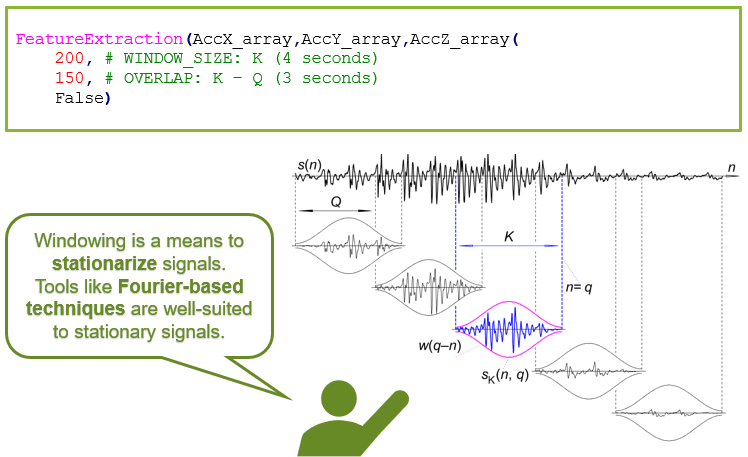


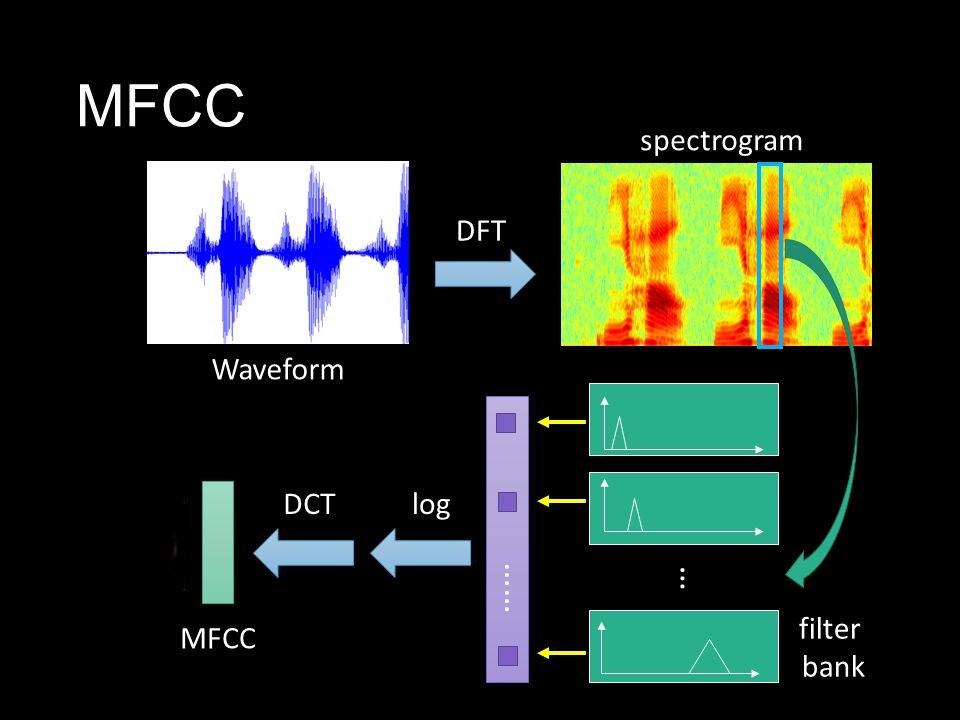

Previous figure summarizes the process of feature extraction. Specifically, the focus is on the calculation of Mel-frequency cepstral coefficients (MFCC) and RASTA-PLP features. MFCCs are computed by measuring the energy in filter banks, which helps in reducing the input's dimensionality and capturing its envelope. These coefficients provide excellent resolution in low frequencies, making them well-suited for speech analysis. However, their suitability for acceleration signals is questioned. The feature set includes 30 MFCCs, akin to a sound file's fingerprint, and 30 RASTA-PLP features, designed to mitigate noise. Additionally, 6 functionals (averages and standard deviations across three channels) are calculated, summing up to a total of 66 features extracted from the audio signals.

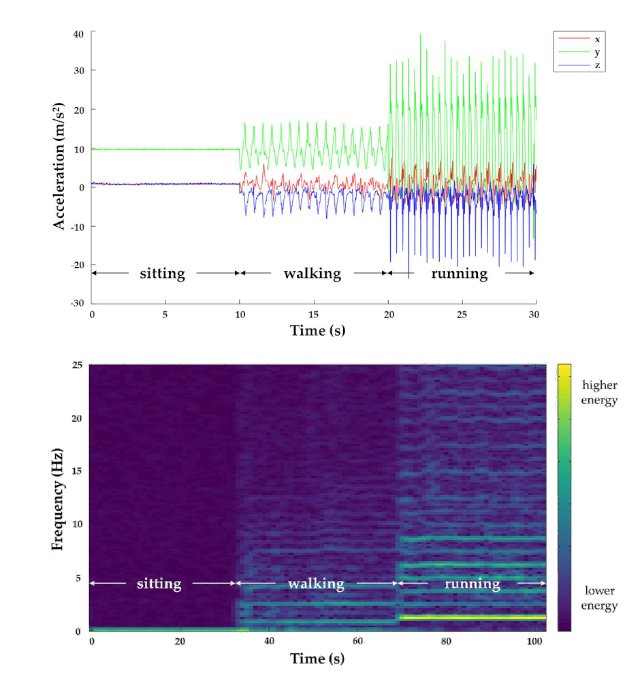

Here is a detailed explanation of what we see in the previous spectrogram:

The spectrogram for the sitting activity shows a narrow band of frequencies centered around 0 Hz. This is because the person's body is not moving very much while they are sitting.
The spectrogram for the walking activity shows a wider band of frequencies than the spectrogram for the sitting activity. This is because the person's body is moving at a wider range of frequencies while they are walking. The spectrogram for the walking activity also shows peaks at certain frequencies, such as the frequency of the person's stride and the frequency of their arm swing.
The spectrogram for the running activity shows a wider band of frequencies and higher peaks than the spectrogram for the walking activity. This is because the person's body is moving at a wider range of frequencies and with more force while they are running.
Overall, the spectrogram shows that the different types of human activity produce different patterns of frequency. These patterns can be used to identify different types of activity.



## 0) Data preparation

In [ ]:
# GENERATE ARRAYS WITH EACH COMPONENT DATA
AccX_array_train = df_train_csv.loc[:, 'param1':'param200']
AccY_array_train = df_train_csv.loc[:, 'param201':'param400']
AccZ_array_train = df_train_csv.loc[:, 'param401':'param600']
labels_train = df_train_csv.loc[:,"class"]
#users_train = df_train_csv.loc[:,"user"]

AccX_array_test = df_test_csv.loc[:, 'param1':'param200']
AccY_array_test = df_test_csv.loc[:, 'param201':'param400']
AccZ_array_test = df_test_csv.loc[:, 'param401':'param600']
labels_test = df_test_csv.loc[:,"class"]
#users_test = df_test_csv.loc[:,"user"]

In [ ]:
labels_train_new = labels_train.replace(class_mapping)
labels_test_new = labels_test.replace(class_mapping)

In [ ]:
labels_test_new

,class
0,CIRCLES
1,CIRCLES
2,CIRCLES
3,SHAKE
4,CIRCLES
5,SHAKE
6,TILT
7,SHAKE
8,SHAKE
9,SHAKE


In [ ]:
# Extract MFCC features from raw data:
# sampling freq of accelerometer: 50 samples/sec
window_size = 200 # 50 samples/sec * 3 secs
overlap = 150 # 50 samples/sec * 2 secs
name_cols = octave.GetFeatureNames()

## 1) Feature estimation

In [ ]:
# GENERATE MFCC FEATURES OF TRAINING SET
mfcc_features_train = pd.DataFrame([], columns=name_cols)
for index in range(len(AccX_array_train)):
  if(index%100==0):
    print('[TRAIN] ', str(index) , 'samples out of', str(len(AccX_array_train)), 'processed...')
  features_train = octave.FeatureExtraction(np.append(AccX_array_train.values[index],[0]),
                                     np.append(AccY_array_train.values[index],[0]),
                                     np.append(AccZ_array_train.values[index],[0]),
                                     window_size, overlap, False)
  mfcc_features_train = pd.concat([mfcc_features_train, pd.DataFrame([features_train], columns=name_cols)], ignore_index=True)

print('[TRAIN] ', str(index+1) , 'samples out of', str(len(AccX_array_train)), 'processed...')

# Append user id and class (as a nominal attribute)
#mfcc_features_train["user"] = users_train.values
mfcc_features_train["class"] = labels_train_new.values
mfcc_features_train.reset_index(drop=True, inplace=True)

[TRAIN]  0 samples out of 71 processed...


/tmp/ipython-input-1399793925.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mfcc_features_train = pd.concat([mfcc_features_train, pd.DataFrame([features_train], columns=name_cols)], ignore_index=True)


[TRAIN]  71 samples out of 71 processed...


In [ ]:
mfcc_features_train

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,54.453259,0.053386,-3.092758,-0.522534,-0.395273,-4.074114,-0.451690,-1.751422,-4.630163,-0.968403,...,-2.364722,-4.064610,-2.965525,8.742609,1.131406,2.045705,1.677041,4.114077,1.051756,TILT
1,53.393969,0.019838,-2.479804,0.280316,-1.456422,-3.896976,-1.935351,0.908456,0.229562,-2.255311,...,-2.548615,-1.948121,-2.708714,9.755024,-1.032504,1.409413,1.308562,2.151562,2.605479,CIRCLES
2,60.672447,-2.370058,-6.082364,-5.391228,-1.237643,0.497383,3.080784,2.349455,-0.406630,-4.573572,...,2.504928,-1.010451,-5.536324,9.336053,2.156229,-0.799714,5.989095,6.591931,3.895949,SHAKE
3,53.629475,-0.160387,-2.767285,-2.242446,-2.263155,-0.717414,-0.187854,-0.525113,-0.198050,0.122386,...,-4.917569,-2.718972,-5.570247,9.878302,-0.203936,0.422686,1.119444,1.708170,2.223709,CIRCLES
4,51.916337,-0.592380,-2.568884,-0.152223,-0.297147,-3.016653,-1.106110,-1.675969,0.077194,-0.087335,...,-1.457054,-4.833452,-3.535504,9.706281,-0.183560,1.577254,1.087273,1.969683,1.848533,CIRCLES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,58.314089,-3.132289,-4.577110,-3.901165,-1.654459,3.079238,3.694854,2.096727,-4.134376,-5.129447,...,1.697366,-3.861286,-5.482331,9.359680,2.110012,-1.001518,5.660089,5.516336,4.051068,SHAKE
67,49.068822,-2.896029,-0.943372,0.384830,-0.582608,0.370012,0.841235,1.049160,-0.814821,1.908119,...,-1.149035,-1.207152,-1.481666,9.249382,1.373068,3.072279,0.738855,0.676765,1.260552,TILT
68,55.209329,-0.488955,-2.360792,-0.207929,-1.300072,-4.448364,-0.090113,-2.038970,-3.251357,-3.171063,...,-2.096027,-3.677912,-3.191474,8.284733,0.909285,2.160040,1.605122,4.816359,1.587478,TILT
69,59.171469,-2.740640,-5.389677,-5.024101,-2.016340,2.548512,3.373660,1.314908,-1.159181,-2.204725,...,0.772398,-2.486918,-3.270509,9.447280,1.862371,-0.460996,7.179963,5.253879,3.965662,SHAKE


In [ ]:
# GENERATE MFCC FEATURES OF TEST SET
mfcc_features_test = pd.DataFrame([], columns=name_cols)
for index in range(len(AccX_array_test)):
  if(index%100==0):
    print('[TEST] ', str(index) , 'samples out of', str(len(AccX_array_test)), 'processed...')
  features_test = octave.FeatureExtraction(np.append(AccX_array_test.values[index],[0]),
                                    np.append(AccY_array_test.values[index],[0]),
                                    np.append(AccZ_array_test.values[index],[0]),
                                    window_size, overlap, False)
  mfcc_features_test = pd.concat([mfcc_features_test, pd.DataFrame([features_test], columns=name_cols)], ignore_index=True)

print('[TEST] ', str(index+1) , 'samples out of', str(len(AccX_array_test)), 'processed...')

# Append user id and class(as a nominal attribute)
#mfcc_features_test["user"] = users_test.values
mfcc_features_test["class"] = labels_test_new.values
mfcc_features_test.reset_index(drop=True, inplace=True)

[TEST]  0 samples out of 18 processed...


/tmp/ipython-input-1900298271.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mfcc_features_test = pd.concat([mfcc_features_test, pd.DataFrame([features_test], columns=name_cols)], ignore_index=True)


[TEST]  18 samples out of 18 processed...


In [ ]:
mfcc_features_test

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,53.576995,-0.603927,-3.136574,-1.167802,-0.658293,-1.525289,-0.581972,-0.864751,0.431751,0.348953,...,-2.765338,-2.925464,-3.688006,9.815865,-0.837893,0.787793,1.004368,1.790779,2.151605,CIRCLES
1,53.832648,-0.012124,-2.333922,-1.407673,-1.568001,-2.011773,-1.028497,-0.035577,-0.885130,-0.565702,...,-1.909196,-3.292204,-3.065006,9.825463,-0.720414,0.873024,1.272896,2.198619,1.632981,CIRCLES
2,53.090900,-1.890568,-2.770466,-1.220978,-1.237250,-2.004235,0.501430,1.847555,0.720828,-0.066422,...,-0.389267,-1.123373,-2.384962,9.721203,0.293203,1.703950,0.902096,1.308343,1.351696,CIRCLES
3,59.722024,-2.884857,-5.444052,-5.639238,-2.430690,2.058240,4.616622,1.691615,-2.534795,-2.065573,...,-2.114439,-4.735749,-3.825802,9.405790,1.649480,-0.318056,7.821232,4.985845,4.099389,SHAKE
4,54.386052,-0.092724,-2.877003,-1.801850,-0.331023,-1.939782,-2.072526,-1.680257,-1.383774,-0.132679,...,-4.362706,-3.781439,-3.958507,9.909133,-0.201042,0.156075,1.116898,1.791340,2.222558,CIRCLES
5,55.631813,-1.659282,-3.680364,-1.428956,-0.273517,1.276443,0.967226,0.649394,0.898987,-0.133180,...,-0.546739,-1.000281,-1.860645,7.151279,-0.309184,4.672385,4.921381,2.082400,3.334586,SHAKE
6,55.806123,-0.912538,-4.010658,-0.018076,-1.940567,-3.337185,0.706400,-1.952709,-3.500766,-1.419584,...,-3.566289,-3.219184,-1.590494,8.385230,-0.410682,2.396153,1.392688,4.729081,1.779181,TILT
7,58.121391,-2.779439,-4.894373,-4.640142,-3.461257,1.213558,4.852994,2.709654,-1.745553,-3.277214,...,2.289790,-2.349276,-3.532429,9.553553,2.112381,-0.777909,6.172780,5.500336,3.946428,SHAKE
8,61.234676,-2.833015,-5.829703,-5.018102,-1.059078,1.466350,2.993747,0.666908,-3.607463,-3.612981,...,-2.340911,-3.957508,-3.257172,9.369933,1.390705,-0.088005,8.876391,5.161405,3.704336,SHAKE
9,58.682349,-3.061894,-5.278392,-4.824081,-2.199014,1.485903,4.106741,2.959059,-1.371987,-3.492865,...,0.745275,-5.510744,-6.961042,9.297183,2.098782,-1.022561,5.689177,5.815260,4.153901,SHAKE


## 2) Feature visualization

[Feature Visualization][ini_sample = %d, end_sample = %d (interval = %d)] 0 18 18
0.CLASS:CIRCLES
1.CLASS:CIRCLES
2.CLASS:CIRCLES
3.CLASS:SHAKE
4.CLASS:CIRCLES
5.CLASS:SHAKE
6.CLASS:TILT
7.CLASS:SHAKE
8.CLASS:SHAKE
9.CLASS:SHAKE
10.CLASS:SHAKE
11.CLASS:CIRCLES
12.CLASS:CIRCLES
13.CLASS:TILT
14.CLASS:TILT
15.CLASS:CIRCLES
16.CLASS:TILT
17.CLASS:TILT


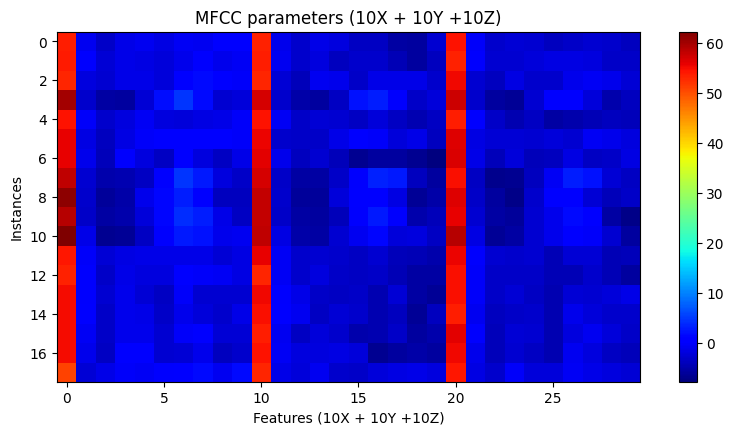

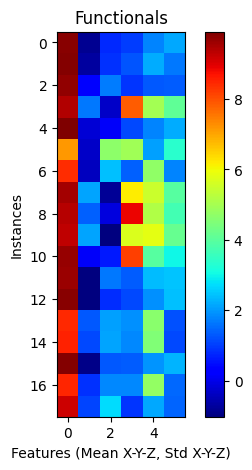

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# PLOT EXTRACTED MFCC SAMPLES
#df_csv = mfcc_features_train
df_csv = mfcc_features_test

# Visualization params
ini_sample = 100
end_sample = 200

samples_interval = end_sample - ini_sample

num_samples = len(df_csv)

if end_sample > num_samples:
  end_sample = num_samples

if end_sample - samples_interval < 0:
  ini_sample = 0

samples_interval = end_sample - ini_sample

print('[Feature Visualization][ini_sample = %d, end_sample = %d (interval = %d)]', ini_sample, end_sample, samples_interval)

# MFCC
MFCC_x = df_csv.loc[ini_sample:end_sample, 'X_MFCC_param1':'X_MFCC_param10'].values.astype(float)
MFCC_y = df_csv.loc[ini_sample:end_sample, 'Y_MFCC_param11':'Y_MFCC_param20'].values.astype(float)
MFCC_z = df_csv.loc[ini_sample:end_sample, 'Z_MFCC_param21':'Z_MFCC_param30'].values.astype(float)

# FUNCTIONALS:
functionals_x = df_csv.loc[ini_sample:end_sample, ['X_mean_param','X_std_param']].values.astype(float)
functionals_y = df_csv.loc[ini_sample:end_sample, ['Y_mean_param','Y_std_param']].values.astype(float)
functionals_z = df_csv.loc[ini_sample:end_sample, ['Z_mean_param','Z_std_param']].values.astype(float)
t = np.linspace(0, 4, 200)

figsize_new = (end_sample-ini_sample)
plt.figure(figsize=(max(10,(int(figsize_new/5))), max(10,(int(figsize_new/5)))))

plt.subplot(212)
plt.imshow((df_csv.loc[ini_sample:end_sample, 'X_MFCC_param1':'Z_MFCC_param30'].values.astype(float)), cmap=plt.cm.jet)
plt.title("MFCC parameters (10X + 10Y +10Z)")
plt.xlabel('Features (10X + 10Y +10Z)')
plt.ylabel('Instances')
plt.colorbar()

# PLOT FUNCTIONALS
plt.figure(figsize=(max(5,(int(figsize_new/10))), max(5,(int(figsize_new/10)))))
plt.imshow((df_csv.loc[ini_sample:end_sample, 'X_mean_param':'Z_std_param'].values.astype(float)),
           cmap=plt.cm.jet)
plt.title("Functionals")
plt.xlabel('Features (Mean X-Y-Z, Std X-Y-Z)')
plt.ylabel('Instances')
plt.colorbar()

#PRINT CLASS
n = 0
for i in df_csv.loc[ini_sample:end_sample, 'class'].values:
  print(str(n)+".CLASS:" + i)
  n+=1
plt.show()


## 3) Feature save

We can save the MFCC features in .csv files

In [ ]:
# We first sort the DataFrame based on the 'class' column
mfcc_features_train = mfcc_features_train.sort_values(by='class')
# We reset the index after sorting
mfcc_features_train = mfcc_features_train.reset_index(drop=True)
# Same for test
mfcc_features_test = mfcc_features_test.sort_values(by='class')
mfcc_features_test = mfcc_features_test.reset_index(drop=True)

In [ ]:
# We save the result
mfcc_features_train.to_csv(root_class_list+'-mfcc_features_train.csv', sep = ",", index=False, header=True)
mfcc_features_test.to_csv(root_class_list+'-mfcc_features_test.csv', sep = ",", index=False, header=True)

We can also download a copy of the .csv files generated...

In [ ]:
# Download MFCC DATASETS ON LOCAL
from google.colab import files
files.download(root_class_list+'-mfcc_features_train.csv')
files.download(root_class_list+'-mfcc_features_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 ... so that we can upload them later! (choose one of the next 2 cells to run it accordingly)

In [ ]:
mfcc_features_train = pd.read_csv(root_class_list+'-mfcc_features_train.csv', header=0)
mfcc_features_test = pd.read_csv(root_class_list+'-mfcc_features_test.csv',  header=0)

Just checking...

In [ ]:
mfcc_features_test

,X_MFCC_param1,X_MFCC_param2,X_MFCC_param3,X_MFCC_param4,X_MFCC_param5,X_MFCC_param6,X_MFCC_param7,X_MFCC_param8,X_MFCC_param9,X_MFCC_param10,...,Z_MFCC_param28,Z_MFCC_param29,Z_MFCC_param30,X_mean_param,Y_mean_param,Z_mean_param,X_std_param,Y_std_param,Z_std_param,class
0,53.576995,-0.603927,-3.136574,-1.167802,-0.658293,-1.525289,-0.581972,-0.864751,0.431751,0.348953,...,-2.765338,-2.925464,-3.688006,9.815865,-0.837893,0.787793,1.004368,1.790779,2.151605,CIRCLES
1,53.832648,-0.012124,-2.333922,-1.407673,-1.568001,-2.011773,-1.028497,-0.035577,-0.885130,-0.565702,...,-1.909196,-3.292204,-3.065006,9.825463,-0.720414,0.873024,1.272896,2.198619,1.632981,CIRCLES
2,53.090900,-1.890568,-2.770466,-1.220978,-1.237250,-2.004235,0.501430,1.847555,0.720828,-0.066422,...,-0.389267,-1.123373,-2.384962,9.721203,0.293203,1.703950,0.902096,1.308343,1.351696,CIRCLES
3,54.876381,-0.462886,-3.210084,-0.888725,-0.962158,-2.538813,-0.156950,1.106869,-2.362015,-2.420760,...,-0.732935,-1.998750,-3.260615,9.828536,-0.918193,1.292685,1.331817,1.946470,2.273131,CIRCLES
4,54.386052,-0.092724,-2.877003,-1.801850,-0.331023,-1.939782,-2.072526,-1.680257,-1.383774,-0.132679,...,-4.362706,-3.781439,-3.958507,9.909133,-0.201042,0.156075,1.116898,1.791340,2.222558,CIRCLES
5,53.193553,0.049779,-3.171456,-1.252274,-1.882304,-1.934384,0.484026,-0.134449,-0.488887,-1.444922,...,-2.990397,-4.165797,-5.593377,9.808053,-1.013867,0.832772,1.149649,1.923025,2.414723,CIRCLES
6,54.226824,-0.124601,-2.489133,-1.441599,-1.248560,-1.384184,-1.281503,-1.221118,-2.324556,-1.593022,...,-2.343210,-4.366333,-3.921587,9.649858,-1.015939,1.649611,1.327811,2.370551,2.444037,CIRCLES
7,62.150931,-1.371111,-6.504616,-6.255707,-3.445463,0.053322,2.766783,2.177313,-0.899695,-0.782217,...,-0.203140,-2.562282,-5.582574,9.685013,0.155598,0.600387,8.159291,3.940448,3.000736,SHAKE
8,58.682349,-3.061894,-5.278392,-4.824081,-2.199014,1.485903,4.106741,2.959059,-1.371987,-3.492865,...,0.745275,-5.510744,-6.961042,9.297183,2.098782,-1.022561,5.689177,5.815260,4.153901,SHAKE
9,61.234676,-2.833015,-5.829703,-5.018102,-1.059078,1.466350,2.993747,0.666908,-3.607463,-3.612981,...,-2.340911,-3.957508,-3.257172,9.369933,1.390705,-0.088005,8.876391,5.161405,3.704336,SHAKE


## 4) Load features for WEKA

In [ ]:
# Load datasets
dataset_train_mfcc = weka.LoadDatasetAsCSV(root_class_list+'-mfcc_features_train.csv', debug = False)
dataset_test_mfcc = weka.LoadDatasetAsCSV(root_class_list+'-mfcc_features_test.csv', debug = False)

In [ ]:
print('Sample size training: ', dataset_train_mfcc.num_instances)
print('Sample size testing: ', dataset_test_mfcc.num_instances)

Sample size training:  71
Sample size testing:  18


In [ ]:
print(dataset_train_mfcc[0:24])

@relation CIRCLES_SHAKE_TILT-mfcc_features_train

@attribute X_MFCC_param1 numeric
@attribute X_MFCC_param2 numeric
@attribute X_MFCC_param3 numeric
@attribute X_MFCC_param4 numeric
@attribute X_MFCC_param5 numeric
@attribute X_MFCC_param6 numeric
@attribute X_MFCC_param7 numeric
@attribute X_MFCC_param8 numeric
@attribute X_MFCC_param9 numeric
@attribute X_MFCC_param10 numeric
@attribute Y_MFCC_param11 numeric
@attribute Y_MFCC_param12 numeric
@attribute Y_MFCC_param13 numeric
@attribute Y_MFCC_param14 numeric
@attribute Y_MFCC_param15 numeric
@attribute Y_MFCC_param16 numeric
@attribute Y_MFCC_param17 numeric
@attribute Y_MFCC_param18 numeric
@attribute Y_MFCC_param19 numeric
@attribute Y_MFCC_param20 numeric
@attribute Z_MFCC_param21 numeric
@attribute Z_MFCC_param22 numeric
@attribute Z_MFCC_param23 numeric
@attribute Z_MFCC_param24 numeric
@attribute Z_MFCC_param25 numeric
@attribute Z_MFCC_param26 numeric
@attribute Z_MFCC_param27 numeric
@attribute Z_MFCC_param28 numeric
@attrib

## 5) WEKA model training

In [ ]:
# TRAIN NEW MODEL WITH MFCC FEATURES
print('Classifying on: ', dataset_train_mfcc.class_attribute)
#Create model architecture:
options_J48 = ["-C", "0.25"]
model_arquitecture_mfcc = weka.CreateClassifier(classname="weka.classifiers.trees.J48", options=options_J48)

# Train model
!cd ../content; mkdir models
out_path_model_mfcc = "models/trained_TreeRandomForest_mfcc.model"
trained_model = weka.TrainModel(dataset_train_mfcc, model_arquitecture_mfcc, out_path_model_mfcc)

Classifying on:  @attribute class {CIRCLES,SHAKE,TILT}
mkdir: cannot create directory ‘models’: File exists

[TrainedModel]


J48 pruned tree
------------------

X_MFCC_param1 <= 56.417835
|   X_mean_param <= 9.35968: TILT (25.0)
|   X_mean_param > 9.35968: CIRCLES (23.0)
X_MFCC_param1 > 56.417835: SHAKE (23.0)

Number of Leaves  : 	3

Size of the tree : 	5



## 6) WEKA model evaluation

In [ ]:
# EVAL TRAINED MODEL WITH MFCC FEATURES
feature_system_test_acc = weka.EvalClassifier(trained_model, dataset_train_mfcc, dataset_test_mfcc)

--------RESULTS IN TRAINING----------

Correctly Classified Instances          71              100      %
Incorrectly Classified Instances         0                0      %
Kappa statistic                          1     
Mean absolute error                      0     
Root mean squared error                  0     
Relative absolute error                  0      %
Root relative squared error              0      %
Total Number of Instances               71     

--------RESULTS IN TEST----------

Correctly Classified Instances          17               94.4444 %
Incorrectly Classified Instances         1                5.5556 %
Kappa statistic                          0.9163
Mean absolute error                      0.037 
Root mean squared error                  0.1925
Relative absolute error                  8.3146 %
Root relative squared error             40.7184 %
Total Number of Instances               18     



In [ ]:
# RECOGNITION
weka.Recognize(trained_model, dataset_test_mfcc)

# - actual - predicted - error - class distribution
1 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
2 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
3 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
4 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
5 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
6 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
7 - CIRCLES - CIRCLES - no  - [1.0, 0.0, 0.0]
8 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
9 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
10 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
11 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
12 - SHAKE - TILT - yes  - [0.0, 0.0, 1.0]
13 - SHAKE - SHAKE - no  - [0.0, 1.0, 0.0]
14 - TILT - TILT - no  - [0.0, 0.0, 1.0]
15 - TILT - TILT - no  - [0.0, 0.0, 1.0]
16 - TILT - TILT - no  - [0.0, 0.0, 1.0]
17 - TILT - TILT - no  - [0.0, 0.0, 1.0]
18 - TILT - TILT - no  - [0.0, 0.0, 1.0]


# Raw data + Temporal Model (LSTM)


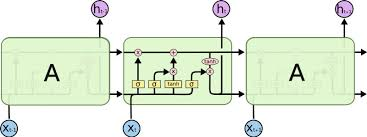

As we have seen in previous scenarios, results are quite good although there are still a possibility to improve them.

In this third scenario, we will implement an LSTM model. LSTM are temporal model invented to deal with temporal data, for this reason they are a good choice for our task.

The main advantages of these models are: they can work directly with raw data without any pre-selection of features, and they also can implement internally more complex functions than other algorithms.

In general, as deeper the network is, more complex function approximates although there is a saturation point, in which the model could start to show over-fitting if it is too complex for the data provided.

As we know, each instance consists of a serie of samples obtained during 4 seconds at a sampling frequency of 50 Hz, which gives 200 samples per component (X, Y, Z axis of accelerometer), thus our time-steps are 200.

First of all, we should prepare the data for having the expected size that the LSTM needs to receive, we do this by calling to the function: PrepareData(...) that will return an array with the shape: (x,200,3).

After having the datasets ready in array formats, we build a simple LSTM model with a single layer of 200 neurons, train it and evaluate it on test set.

Let's see the performance of the model and its results.

**Note**: To accelerate the LSTM training, it is highly recommended to use a Collab environment with GPU: Edit > Notebook settings or Runtime> Hardware accelerator select GPU.

If the environment is working with a GPU, after running next code cell it should print something like this:

TEST GPU is working: /device:GPU:0

If the result is just:


TEST GPU is working:

It means that you are not running on a GPU.


## LSTM Functions

The fourth group is composed by the neccesary functions for preparing dataset, an LSTM model (architecutre definition, training, evaluation...)
Do you feel curiosity about how LSTM works?? Check this!: http://colah.github.io/posts/2015-08-Understanding-LSTMs/   || https://www.youtube.com/watch?v=QciIcRxJvsM&ab_channel=CodeEmporium

Run it now to have the functions ready for applying them later.

In [ ]:
import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
print("TEST GPU is working: ", tf.test.gpu_device_name())
print("Tensorflow version:", tf.__version__)

TEST GPU is working:  /device:GPU:0
Tensorflow version: 2.19.0


In [ ]:
import pandas as pd
import numpy as np

#from tensorflow.python.keras.models import Sequential
from tensorflow.keras import Sequential
#from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def PrepareData(df_csv, num_steps = 200, dimensions=3):
  """
    Prepare dataset for introducing data into LSTM. One important characteristic of LSTM is that they are temporal models, so data must follow a specific shape:
    (num_samples, num_steps, num_attributes), in our case for the training set will be: (4.800, 200, 3). We use 200 timesteps (4 secs.) because each sample has this temporal resoulution, number 3 makes reference to
    the number of attributes, in our case 3 becasue we introduce information about the 3-axis of the accelerometer signal.
    This function results the dataset as X and the labels in the array y.
    :param df_csv: Dataframe with the set to convert
    :param num_steps: Number of timesteps
    :param dimensions: Number of attributes
  """
  if 'user' in df_csv.columns:
    print('[PrepareData][Dropping \'user\' column...]')
    print('[PrepareData][OLD df shape]', df_csv.shape)
    df_csv = df_csv.drop(columns='user')
    print('[PrepareData][NEW df shape]', df_csv.shape)

  # We select all rows (:) and all columns up to the last column (:-1).
  # This means it includes all columns except for the last one (i.e. the class).
  X_pre = df_csv.iloc[:, :-1].values

  #print(df_csv.shape)
  #  y_pre will be a Pandas Series containing the data from the last column of the DataFrame df_csv.
  # The specific data in y_pre will depend on the content of that column in the DataFrame.
  y_pre = df_csv.iloc[:, -1]
  print('y_pre')
  print(y_pre.shape)
  print(y_pre)
  y_pre_dum = pd.get_dummies(y_pre).values
  print('y_pre_dum')
  print(y_pre_dum)
  X = []
  y = []

  num_samples = X_pre.shape[0]
  print('num_samples = %d (matches the number of rows)' % num_samples)
  print('num_steps = %d (matches the number of columns)' % num_steps)
  #print(X_pre)
  #print(X_pre.shape)
  for j in range(num_samples):   # row
      #print('iter j=%d' % j)
      for i in range(num_steps):    # column
          #print('iter i=%d' % i)
          X.append([X_pre[j, i], X_pre[j, i+num_steps], X_pre[j, i+(2*num_steps)]])

  data = np.array(X)
  X = data
  y = y_pre_dum
  X = X.reshape(-1, num_steps, dimensions)
  return X, y

def CreateLSTM(neurons_first_layer = 200, n_steps = 200, dimension = 3, loss='categorical_crossentropy',
               optimizer='rmsprop', metrics=['accuracy']):
  """
    Create LSTM model
    :param neurons_first_layer: Number of neurons of the first layer. This number can be different from the number of timesteps.
    :param n_steps: Number of timesteps of the input.
    :param dimensions: Number of attributes of the input
    :param loss: Loss function that the network will use during training for reducing its error
    :param optimez: Optimizer to use for the update rule and the training process
    :param metrics: List with the metrics to print during training
  """
  model_lstm = Sequential()
  model_lstm.add(LSTM(neurons_first_layer, input_shape=(n_steps, dimension), return_sequences=False, activation="tanh"))
  model_lstm.add(Dense(3, activation='softmax'))
  model_lstm.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model_lstm

def EvalLSTM(y_labels, y_pred, num_classes):
  """
     Eval LSTM model. Print accuracy and confussion matrix.
    :param y_labels: Original labels of the set.
    :param y_pred: Predictions of the labels for the set.
  """
  #y_test_df = pd.DataFrame({0:y_labels[:,0],
  #                          1:y_labels[:,1],
  #                          2:y_labels[:,2],
  #                          3:y_labels[:,3]})

  # Create the DataFrame using a dictionary comprehension
  y_test_df = pd.DataFrame({i: [row[i] for row in y_labels] for i in range(num_classes)})

  y_test_df_idx=y_test_df.idxmax(axis=1)

  print(confusion_matrix(y_test_df_idx, y_pred))
  print(classification_report(y_test_df_idx, y_pred))
  eval_accuracy = 100 * accuracy_score(y_test_df_idx, y_pred)
  print('Accuracy %0.4f' % eval_accuracy)

  return eval_accuracy

def Recognize_LSTM(trained_LSTM, test_parameters, test_labels, class_mapping):
  """
    Make predictions of full dataset and print information of each sample results.
    :param trained_classifier: Classifier built and trained(see TrainModel)
    :param test_dataset: Dataset loaded in Weka format with data to test (see LoadDatasetAsCSV or LoadDataset).
  """
  y_pred = trained_LSTM.predict(test_parameters)
  print("# - actual - predicted - error - class distribution")
  for index in range(0,len(test_labels)):
    pred = display.Convert2nominal_activities(np.argmax(y_pred[index],axis=-1)+1, class_mapping)
    true_val = display.Convert2nominal_activities(np.argmax(test_labels[index],axis=-1)+1, class_mapping)
    print("%d - %s - %s - %s  - %s" %
              (index+1,
              true_val,
              pred,
              "yes" if pred != true_val else "no",
              str(y_pred[index])))


## 0) Data preparation

In [ ]:
# We re-use the same experimental setup that was defined at the beginning of the notebook
print(df_train_csv.shape)
print(df_test_csv.shape)

(71, 601)
(18, 601)


In [ ]:
print(df_train_csv[0:24])

       param1     param2     param3     param4     param5     param6  \
0    7.346081   7.094749   6.931981   6.790756   7.006184   7.116292   
1    8.523752   8.554869   8.444762   8.351410   9.387856  10.053287   
2   15.778875  12.317671   7.559115   4.473713   2.661728   2.161457   
3    9.727753   9.713391   9.655943   9.095832   9.012054   9.237056   
4    9.282536   9.995841   9.172428   9.272961   9.313653   9.203546   
5   22.122021  24.120709  24.120709  16.865587  11.867667   2.795771   
6    9.485995  10.330949   9.232269   8.423219   8.442368   8.102472   
7    6.908045   5.744736   3.140456   5.395264   4.344456   3.908814   
8    7.403528   7.403528   7.872682   7.915768   9.091044   9.251418   
9   23.855017  20.281311  15.896163   9.624826   2.781410  -0.016755   
10   9.083864   8.281994   8.731999   9.797168   9.768444   8.767903   
11   4.310946   4.732226   6.029579   8.171887  11.405695  13.854388   
12   9.521899   9.828285  10.129885  11.791071  11.865273  10.70

In [ ]:
# We get the data ready for the LSTM model
X_train, y_train = PrepareData(df_train_csv, num_steps = 200, dimensions=3)
X_test, y_test = PrepareData(df_test_csv, num_steps = 200, dimensions=3)

y_pre
(71,)
0        TILT
1     CIRCLES
2       SHAKE
3     CIRCLES
4     CIRCLES
       ...   
66      SHAKE
67       TILT
68       TILT
69      SHAKE
70    CIRCLES
Name: class, Length: 71, dtype: object
y_pre_dum
[[False False  True]
 [ True False False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [False False  True]
 [ True False False]
 [ True False False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False  True False]
 [ True False False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False False  True]
 [ True False False]
 [False False  True]
 [False False  True]
 [ True 

In [ ]:
# We will be using categorical cross-entropy as the loss function,
# which typically implies that we should have one-hot encoded labels for classification tasks
print(y_train.shape)
y_train[0:24][:]

(71, 3)


array([[False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False]])

In [ ]:
print(X_train.shape)
X_train[0:24][:]

(71, 200, 3)


array([[[ 7.34608097,  5.89553529,  1.16570267],
        [ 7.09474893,  6.3048474 ,  1.82634726],
        [ 6.93198116,  6.36708224,  2.02262572],
        ...,
        [ 8.15513155,  2.70241964,  2.09443493],
        [ 6.76921397,  3.68381193,  2.40321455],
        [ 7.01336505,  4.90217463,  2.02262572]],

       [[ 8.52375172, -0.54096261,  5.0649424 ],
        [ 8.55486943,  0.47394073,  5.56281936],
        [ 8.44476168,  1.34043837,  6.04394113],
        ...,
        [11.16154297,  1.06756344,  0.48351525],
        [11.36021498,  1.46730132,  0.33989689],
        [10.42669531,  1.64921799,  0.67500645]],

       [[15.77887516,  4.98355851, -3.55694899],
        [12.31767082,  2.44869361, -1.39070484],
        [ 7.55911492, -0.18909757,  2.44151279],
        ...,
        [13.63417259,  8.75593471, -2.59231219],
        [10.09397938,  5.19659246,  0.3662269 ],
        [ 7.26948479, -0.18191664,  1.02208423]],

       ...,

       [[ 8.55486943,  6.29048605, -1.68272882],
        [16

## 1) LSTM model training

In [ ]:
callback_EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# LSTM model definition
model_lstm_ES = CreateLSTM(neurons_first_layer = 200,
                           n_steps = 200,
                           dimension = 3,
                           loss='categorical_crossentropy',
                           optimizer='rmsprop',
                           metrics=['accuracy'])

model_lstm_ES.add(Dense(num_classes, activation='softmax'))  # Assuming you have 4 classes

# Train model
model_lstm_ES.fit(X_train,
               y_train,
               batch_size=16,
               epochs=80) # validation_data=(X_validation, y_validation),

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3198 - loss: 1.1446
Epoch 2/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3545 - loss: 1.0737
Epoch 3/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3328 - loss: 0.9974
Epoch 4/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3181 - loss: 0.9972
Epoch 5/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3224 - loss: 0.9562
Epoch 6/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3484 - loss: 0.9159 
Epoch 7/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3250 - loss: 0.9343
Epoch 8/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3684 - loss: 0.9120
Epoch 9/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3380 - loss: 0.9178
Epoch 10/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3250 - loss: 0.9432
Epoch 11/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3146 - loss: 0.9086
Epoch 12/80
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3701 - loss: 0.8823


## 2) LSTM model evaluation

In [ ]:
# EVAL LSTM MODEL
# Predict classes on training/validation/test sets
y_pred_train_x = model_lstm_ES.predict(X_train)
y_pred_train_ES = np.argmax(y_pred_train_x, axis=1)

y_pred_test_x = model_lstm_ES.predict(X_test)
y_pred_test_ES = np.argmax(y_pred_test_x, axis=1)

# Eval model on training/test sets
print("---- TRAINING RESULTS: -----")
EvalLSTM(y_train, y_pred_train_ES, num_classes)

print("---- TEST RESULTS: -----")
lstm_system_test_acc = EvalLSTM(y_test, y_pred_test_ES, num_classes)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
---- TRAINING RESULTS: -----
[[23  0  0]
 [ 0 23  0]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        25

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71

Accuracy 100.0000
---- TEST RESULTS: -----
[[7 0 0]
 [1 5 0]
 [0 0 5]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         5

    accuracy                           0.94        18
   macro avg       0.96      0.94      0.95        18
weighted avg       0.95      0.94      0.94        18

Accuracy 94.4444


In [ ]:
# Extract distribution of predictions:
y_pred_example = model_lstm_ES.predict(X_test)
print('[Probability distribution for predictions]')
print(y_pred_example)
print()

Recognize_LSTM(model_lstm_ES, X_test, y_test, class_mapping)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[Probability distribution for predictions]
[[0.6244583  0.10808073 0.26746103]
 [0.6244706  0.10807651 0.26745287]
 [0.6244662  0.10807949 0.2674543 ]
 [0.22854632 0.59506935 0.17638436]
 [0.6244276  0.10810234 0.26747   ]
 [0.61964816 0.10973674 0.2706151 ]
 [0.21914075 0.22980915 0.55105007]
 [0.22854488 0.595074   0.17638107]
 [0.22854558 0.59507096 0.17638347]
 [0.22854362 0.59507686 0.17637955]
 [0.2285651  0.5950163  0.17641862]
 [0.62445307 0.10808152 0.26746535]
 [0.6244697  0.108077   0.2674533 ]
 [0.2189973  0.22984691 0.5511558 ]
 [0.2189596  0.22985704 0.55118334]
 [0.62446517 0.10808115 0.2674537 ]
 [0.21895255 0.2298629  0.5511846 ]
 [0.21899277 0.22984698 0.5511602 ]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
# - actual - predicted - error - class distribution
1 - CIRCLES - CIRCLES - no  - [0.6244583  0.10808073 0.26746103]
2 - CIRCLES - CIRCLES - no  - [0.6244706  0.10807651 0.26745287]
3 - CIRCLES - CIRCLES - no  - [0.6244662  0.10807

## 3) LSTM model save

To save data in your Collab in folder 'models'.

In [ ]:
# Save LSTM model
model_name = '-LSTM_from_raw'
out_path_model_lstm_json = general_path + '/models/' + root_class_list + model_name + '.json'
out_path_model_lstm_h5 = general_path + '/models/' + root_class_list + model_name + '.weights.h5'

# Serialize model description to JSON
model_json = model_lstm_ES.to_json()
with open(out_path_model_lstm_json, "w") as json_file:
    json_file.write(model_json)

# Serialize model weights to HDF5
model_lstm_ES.save_weights(out_path_model_lstm_h5)

print('[NEW MODEL][Successfully saved!]')
print('\tMODEL NAME: %s' % model_name)
print('\t.json file in:\n%s' % out_path_model_lstm_json)
print('\t.h5 file in:\n%s' % out_path_model_lstm_h5)

[NEW MODEL][Successfully saved!]
	MODEL NAME: -LSTM_from_raw
	.json file in:
/content/drive/MyDrive/HAR_INERCIAL//models/CIRCLES_SHAKE_TILT-LSTM_from_raw.json
	.h5 file in:
/content/drive/MyDrive/HAR_INERCIAL//models/CIRCLES_SHAKE_TILT-LSTM_from_raw.weights.h5


## 4) LSTM model load

In [ ]:
# LOAD MODELS
from keras.models import model_from_json

# First we load the json
json_file = open(out_path_model_lstm_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

# Then create the model
loaded_model = model_from_json(loaded_model_json)

# We finally load the weights into the new model
loaded_model.load_weights(out_path_model_lstm_h5)
print("Loaded model from disk")

# Check loaded model
print('')
print('[Testing model running some predictions]')
y_pred_example = loaded_model.predict(X_test)
print(y_pred_example)

Loaded model from disk

[Testing model running some predictions]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
[[0.6244583  0.10808073 0.26746103]
 [0.6244706  0.10807651 0.26745287]
 [0.6244662  0.10807949 0.2674543 ]
 [0.22854632 0.59506935 0.17638436]
 [0.6244276  0.10810234 0.26747   ]
 [0.61964816 0.10973674 0.2706151 ]
 [0.21914075 0.22980915 0.55105007]
 [0.22854488 0.595074   0.17638107]
 [0.22854558 0.59507096 0.17638347]
 [0.22854362 0.59507686 0.17637955]
 [0.2285651  0.5950163  0.17641862]
 [0.62445307 0.10808152 0.26746535]
 [0.6244697  0.108077   0.2674533 ]
 [0.2189973  0.22984691 0.5511558 ]
 [0.2189596  0.22985704 0.55118334]
 [0.62446517 0.10808115 0.2674537 ]
 [0.21895255 0.2298629  0.5511846 ]
 [0.21899277 0.22984698 0.5511602 ]]


# Systems Comparison


In this last section, we will compare results obtained from our trained models.


Comparing models is a common practice in the field of machine learning and data science to determine which model provides the best performance for a particular problem. When comparing models, the goal is to identify which one is capable of making more accurate and generalizable predictions.

When comparing models, it is important to consider the number of samples you are working with. The sample size can have a significant impact on the performance of the models and the reliability of the evaluation metrics. Depending on whether you have used cross-validation or split the data into train and test sets.

**TO DO:**
Modify the accuracy values in the cell below with the accuracy reached by your models and comment the results.
You will use either the total number of data or the number of test data when indicating the variable "num_sample_test".

In [ ]:
num_samples_test = len(y_test)
CI_raw = hu.CalculateCI(num_samples_test, raw_system_test_acc)
CI_mfcc = hu.CalculateCI(num_samples_test, feature_system_test_acc)
CI_lstm = hu.CalculateCI(num_samples_test, lstm_system_test_acc)

print('Raw data tree model acc (%%) = %.02f (%.02f, %.02f)' %
  (raw_system_test_acc,
  raw_system_test_acc-CI_raw,
  raw_system_test_acc+CI_raw))
print('MFCC tree model acc (%%) = %.02f (%.02f, %.02f)' %
  (feature_system_test_acc,
  feature_system_test_acc-CI_raw,
  feature_system_test_acc+CI_raw))
print('LSTM model acc (%%) = %.02f (%.02f, %.02f)' %
  (lstm_system_test_acc,
  lstm_system_test_acc-CI_raw,
  lstm_system_test_acc+CI_raw))

Raw data tree model acc (%) = 66.67 (44.89, 88.44)
MFCC tree model acc (%) = 94.44 (72.67, 116.22)
LSTM model acc (%) = 94.44 (72.67, 116.22)


[Text(-0.4, 0, ''),
 Text(-0.2, 0, ''),
 Text(0.0, 0, ''),
 Text(0.20000000000000007, 0, ''),
 Text(0.4, 0, ''),
 Text(0.6, 0, ''),
 Text(0.8000000000000002, 0, ''),
 Text(1.0, 0, ''),
 Text(1.2000000000000002, 0, ''),
 Text(1.4, 0, '')]

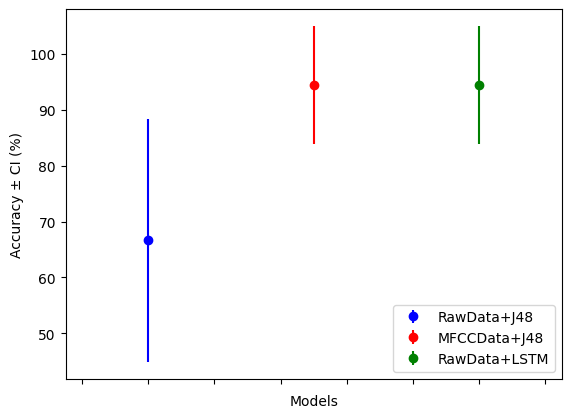

In [ ]:
# PLOT RESULTS
import matplotlib.pyplot as plt
import numpy as np

#ARRAYS/INFO TO PLOT
means = [raw_system_test_acc, feature_system_test_acc, lstm_system_test_acc]
CI = [CI_raw, CI_mfcc, CI_lstm]

#PLOT DATA
fig,ax = plt.subplots(1)
plt.errorbar([0], [raw_system_test_acc], yerr=[CI_raw], fmt='o',label='RawData+J48', color="blue")
plt.errorbar([0.5], [feature_system_test_acc], yerr=[CI_mfcc], fmt='o', label='MFCCData+J48', color="red")
plt.errorbar([1], [lstm_system_test_acc], yerr=[CI_lstm], fmt='o',label='RawData+LSTM', color="green")
#FORMAT OF PLOT
plt.xlim(-0.25, 1.25)
plt.legend(loc='lower right')
plt.ylabel('Accuracy ± CI (%)')
plt.xlabel('Models')
ax.set_xticklabels([])